## Sound Synthesis of a Sword Fight

The aim of this project is to synthesise the sound(s) of a sword fight. Think of
two Japanese samurai. You will control the sonic aspects of the sword sounds
generated by one of the opponents. The sounds that you will generate will
have the following components:

## 1. Drawing the sword (draw~): 

Generate the sound of the sword being
drawn. Before this there can be no sword sound. Check if sword was drawn by
the user. If so, the opponent (not controlled by the user) will also draw their
sword. Think of the sword as a rectangular, metallic lamina in this case. You
are exciting the sword with a randomly generated signal (i.e. bandpass filtered
noise possibly with a voltage controlled filter). The control parameter which will
be one of the inlets is speed. The other inlet will expect a bang to draw or put
the sword back. A third inlet will expect magnitude. (20 pts) One of the outlets
will

## 2. Swinging sound (swing~): You will need to model the sound of a swinging
sword. The control parameters will be the (a) length of the sword (b) thickness of the sword, (c) speed of
the sword. You will need to decide on whether or not to generate swinging sword sound. If the movement
does not generate turbulence, there will be no sound. (50 pts)

## 3. Fight: 
There are two samurai. If swords of two samurai hit each other (RANDOMLY, you will need to generate the appropriate
sound of two metallic swords hitting each other (hit~). If the user swings their sword the opponent will
respond with a random delay between 100-500 ms. These will be controlled by a fighttimer~ object.

## 4. GUI: 
Please provide only the necessary controls (drawbang, speed, intensity, length, thickness) to the
user. Use Graph-on-parent feature of puredata. 

This part was not added to implementation, future work :

5. Spatial effects: You will use stereophonic panning to pan the three sword sounds (draw/replace, swing,
hit) based on their positions. Control and display these points using a grid element from the unauthorized
package at https://puredata.info/downloads/unauthorized This is not part of PD vanilla version so you may
need to install it via the package manager. 
5. Room: Samurai are within a room. Use one of the existing standard reverberators in pd to simulate the
room effect.


## Some Notes

• After drawing, there is only a one pair of swooshing sound. To continue, click the message :

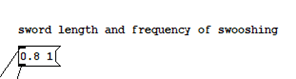

    Reynolds number automatically recalculated if you change and hit this message.

You can also switch to “random swooshing model” if you do not want to initate the swooshes manually :
          
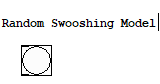


You can manually hit them with the blue bang. Or you can use “random hit”

    •Because of some timing incompatiblity, I disabled the draw “speed” control. You can still see it inside the “draw_run” object, unconnected.

    •Speed at the tip of the sword is calculated (pd Reynolds) with v = 2* π * L * w where,

    L =sword length and w = angular velocity
    If you think you are rotating the sword 360 degrees in half seconds, it would be 120 rpm. 120 rpm = 2 Hz which may be the second argument of the above message (“freq. of swooshing”)

# Objects

Draw_run : Execute drawing sound with a proper timing command (vline)

	Draw_a : Users drawing model
	Draw_b : Opponents drawing model (I made them slightly different to follow easily)
    
		Swordd  : Model of the sword with some band pass filters
		Sword : Another sword model for different opponent, I did not used at the final model.
        
	Swosh_env : Includes necessary vline object 
    
Pd Reynolds : Calculates the Reynolds number. If Re<50000, no swoosh sound. (Reynolds number is 2000 for internal flow (pipe, closed duct etc. but it is 50000 for external flow like sword or air flow over plate etc)

Pd swing:

	Swosh_run_a : Execute swooshing sound with a proper timing command (vline) for user
    
	Swosh_run_b : Execute swooshing sound with a proper timing command (vline) for enemy.
    
		Swosh : Swoosh model, few bandpass filters and oscillator
		Swosh_env_a/b : Timing of swoosh for user/enemy
        
	Pd fighttimer : Delays the opponents move (random 100 -500ms or 400-800ms): the second swoosh sound that you hear
    
I did not know that "message"s are not visible on graph on parent. Did not have time to fix the appearance

Hit : Model of hitting sound, it also have a ping metallic sound to represent the actual reverberation of the sword if there is an impact. (swordping ~)


